<a href="https://colab.research.google.com/github/milamarcheva/morphemic_tokenisation/blob/main/partIII_dissertation_datasplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations & imports

In [ ]:
import pandas as pd

import ast
import numpy as np
import matplotlib.pyplot as plt

import spacy

import en_core_web_sm
# nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_web_sm")

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('drive')

Mounted at drive


###Spacy version 3 with morphology

In [ ]:
!pip show spacy
#should be 3 and above to use token.morph

Name: spacy
Version: 3.3.0
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: typing-extensions, thinc, srsly, spacy-legacy, murmurhash, cymem, preshed, requests, jinja2, numpy, blis, catalogue, wasabi, spacy-loggers, packaging, langcodes, tqdm, pathy, pydantic, setuptools, typer
Required-by: fastai, en-core-web-sm


In [ ]:
# !pip list

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 6.2 MB 4.3 MB/s 
     |████████████████████████████████| 181 kB 57.5 MB/s 
     |████████████████████████████████| 457 kB 50.4 MB/s 
     |████████████████████████████████| 660 kB 47.6 MB/s 
     |████████████████████████████████| 10.1 MB 40.4 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    U

     |████████████████████████████████| 12.8 MB 5.3 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Reading in Gold standard tagged data

In [ ]:
filepath_gold_full = r'drive/My Drive/Colab Notebooks/all_sents_goldtag_full.txt'
filepath_gold_short = r'drive/My Drive/Colab Notebooks/all_sents_goldtag_short.txt'

In [ ]:
file1 = open(filepath_gold_full, 'r')
unprocessed_sents = file1.readlines()
file1.close()


In [ ]:
goldfull_words_tags = [(s.split()[::2], s.split()[1::2]) for s in unprocessed_sents]

In [ ]:
goldfull_words_tags[:10]

[(['you', 'want', 'to', 'see', 'the', 'book'],
  ['PRON', 'VB', 'TO', 'VB', 'DET', 'N']),
 (['look', 'there', '-s', 'a', 'boy', 'with', 'his', 'hat'],
  ['VB', 'EX', 'VBZ', 'DET', 'N', 'PREP', 'DET', 'N']),
 (['and', 'a', 'doggie'], ['CCONJ', 'DET', 'N']),
 (['you', 'want', 'to', 'look', 'at', 'this'],
  ['PRON', 'VB', 'TO', 'VB', 'PREP', 'DET']),
 (['look', 'at', 'this'], ['VB', 'PREP', 'DET']),
 (['have', 'a', 'drink'], ['VB', 'DET', 'N']),
 (['okay', 'now'], ['ADV', 'ADV']),
 (['what', '-s', 'this'], ['WP', 'VBZ', 'DET']),
 (['what', '-s', 'that'], ['WP', 'VBZ', 'DET']),
 (['what', 'is', 'it'], ['WP', 'VBZ', 'PRON'])]

In [ ]:
goldshort_words_tags = []

In [ ]:
full2short = {"ADV":"A", "ADJ":"A", "CCONJ":"CCONJ", "CX":"CX", "DET":"DET", "EX":"EX", "ING": "ING", "INTJ":"INTJ", "MD":"V", "N":"N", "N-coll": "N", "N-irplr": "N", "NNP":"N", "NUM":"NUM", "PLR":"PLR", "POSS":"DET", "PREP":"PREP", "PRON":"N", "RP":"RP", "TNS":"T", "TO":"T",
              "V-irpst":"V", "VB":"V", "VBN":"V", "VBZ":"T", "WDT":"DET", "WP":"N", "WP$":"N", "PUNCT":"PUNCT", "SYM":"SYM"}

In [ ]:
count = 0
for (ws, ts) in goldfull_words_tags:
  # print(ws)
  # if 'PUNCT'  or 'SYM' in ts:
  #   count+=1
  # continue
  try:
    new_ts = [full2short[t] for t in ts]
    goldshort_words_tags.append((ws, new_ts))
  except:
    print(ws, ts)


['oh', 'is', 'that', 'baby', 'softly', 'slumber'] ['INTJ', 'VBZ', 'PREP', '-s', 'ADV', 'N']
['oh', 'pound', 'puppy'] ['INTJ', 'N', '-s']
['they', 'were', 'call', '-ed', 'butter', 's', 'oat', 'meal', 'scotch'] ['PRON', 'V-irpst', 'VB', 'TNS', 'N', 'POSS', 'N', 'N', '-s']
['it', '-s', 'the', 'kuzoo', 'the', 'cabbage', 'patch', 'um', 'pet', 'i', 'guess'] ['PRON', 'VBZ', 'DET', 'N', 'DET', 'N', '-s', 'INTJ', 'N', 'PRON', 'VB']
['you', 'got', 'the', 'muppet', 'baby', 'plate'] ['PRON', 'V-irpst', 'DET', 'N', '-s', 'N']
['you', 'got', 'the', 'muppet', 'baby', 'plate'] ['PRON', 'V-irpst', 'DET', 'N', '-s', 'N']
['just', 'mommy', 'and', 'daddy', '-s'] ['ADV', '-s', 'CCONJ', 'N', 'PLR']
['now', 'you', 'have', 'to', 'build', 'a', 'big', 'great', 'big', 'boat', 'for', 'all', 'the', 'mommy'] ['ADV', 'PRON', 'VB', 'TO', 'VB', 'DET', 'ADJ', 'ADJ', 'ADJ', 'N', 'PREP', 'DET', 'DET', '-s']


In [ ]:
count

223444

In [ ]:
goldshort = []
for ws, ts in goldshort_words_tags:
  res = ws + ts
  res[::2] = ws
  res[1::2] = ts
  goldshort.append(res)

In [ ]:
goldshort = [" ".join(g)+'\n' for g in goldshort]

In [ ]:
file1 = open(filepath_gold_short, 'w')
unprocessed_sents = file1.writelines(goldshort)
file1.close()


### Checks

In [ ]:
for i in range(len(unprocessed_sents)):
  s = unprocessed_sents[i]
  if not len(s.split())%2 == 0:
    print(i,s.split(), len(s.split()))

87433 ['want', 'VB', 'to', 'TO', 'do', 'VB', 'cha', 'INTJ', 'cha', 'INTJ', 'cha', 'INTJ', 'N'] 13
116556 ['it', 'PRON', 'look', 'VB', '-s', 'TNS', 'like'] 7


In [ ]:
unprocessed_sents[7929:8129]
for i in range(len(unprocessed_sents[7929:8129])):
  s = unprocessed_sents[i]
  if len(s.split())<4:
    print(i, s.split())


14 ['that', 'DET']
15 ['yes', 'INTJ']
16 ['okay', 'ADJ']
21 ['yeah', 'INTJ']
24 ['look', 'VB']
25 ['look', 'VB']
34 ['okay', 'ADJ']
37 ['what', 'WP']
38 ['what', 'WP']
43 ['yeah', 'INTJ']
46 ['look', 'VB']
51 ['that', 'DET']
72 ['bunny', 'N']
74 ['look', 'VB']
76 ['peekaboo', 'N']
78 ['that', 'DET']
84 ['there', 'ADV']
91 ['hello', 'INTJ']
94 ['hi', 'INTJ']
98 ['hello', 'INTJ']
103 ['say', 'INTJ']
108 ['hello', 'INTJ']
114 ['what', 'WP']
115 ['look', 'VB']
126 ['hello', 'INTJ']
131 ['okay', 'ADJ']
139 ['block', 'N']
140 ['block', 'N']
145 ['hello', 'INTJ']
147 ['look', 'VB']
150 ['peekaboo', 'N']
152 ['peekaboo', 'N']
153 ['you', 'PRON']
155 ['here', 'ADV']
158 ['open', 'ADJ']
161 ['okay', 'ADJ']
164 ['no', 'INTJ']
165 ['there', 'ADV']
167 ['okay', 'ADJ']
168 ['what', 'WP']
170 ['what', 'WP']
171 ['yeah', 'INTJ']
176 ['here', 'ADV']
177 ['what', 'WP']
178 ['daddy', 'N']
181 ['daddy', 'N']
184 ['say', 'INTJ']
185 ['mommy', 'N']
186 ['block', 'N']
187 ['here', 'ADV']
188 ['okay', 'ADJ']


##Reading in data for preprocessing

In [ ]:
filepath_uci = r'drive/My Drive/Colab Notebooks/brent9mos.txt'
filepath_br =  r'drive/My Drive/Colab Notebooks/br-text.txt'
filepath_tb = r'drive/My Drive/Colab Notebooks/CHILDESTreebank-curr/all_sents_tb.txt'

In [ ]:
def file_to_df(fp, dataset):
  file1 = open(fp, 'r')
  unprocessed_sents = file1.readlines()
  file1.close()

  unprocessed_sents = [us.strip() for us in unprocessed_sents]
  size = len(unprocessed_sents)
  ds = [dataset]*size
  orig = unprocessed_sents

  if dataset == 'br':
    low = unprocessed_sents
  else:
    low = [us.lower() for us in unprocessed_sents]

  if dataset == 'uci' or dataset == 'br':
    low_nopunct = low
  else:
    low_nopunct = [us.replace('!', '').replace('?', '').replace('.', '').replace(',', '').replace('(', '').replace(')', '').replace(':', '').replace(';', '') for us in low]


  docs = [nlp(us) for us in unprocessed_sents]

  tokenised = [[t.lower_ for t in doc if not t.is_punct] for doc in docs]

  data = [ds, orig, low, low_nopunct, tokenised, ]#docs]
  # print(len(ds))
  # print(len(orig))
  # print(len(low))

  columns =  ['ds', 'orig', 'low', 'low_nopunct', 'tokenised', ]#'docs']

  res = pd.DataFrame(data,)

  res = res.transpose()
  res.columns = columns
  return res

In [ ]:
df_br = file_to_df(filepath_br, 'br')

In [ ]:
df_br

In [ ]:
df_uci = file_to_df(filepath_uci, 'uci')

In [ ]:
df_uci

In [ ]:
df_tb = file_to_df(filepath_tb, 'tb')

In [ ]:
df_tb

In [ ]:
df_all_sents  = pd.concat([df_br, df_uci, df_tb])

In [ ]:
df_all_sents.reset_index(inplace=True)

In [ ]:
df_all_sents.to_csv(r'drive/My Drive/Colab Notebooks/df_all_sent.csv', index=False)

## Read CSV if previous step has been done

In [ ]:
df_all_sents = pd.read_csv(r'drive/My Drive/Colab Notebooks/df_all_sent.csv')

In [ ]:
df_all_sents

,ds,orig,low,low_nopunct,tokenised,simple_length,progressive,prep_on,prep_in,irreg_past,...,reg_3rd,irreg_3rd,uncontr_aux,contr_copula,contr_aux,logprobs_GPT2,parses_PCFG,tokenised_morphStem,tokenised_morphLemma,reg_plural
0,br,you want to see the book,you want to see the book,you want to see the book,"['you', 'want', 'to', 'see', 'the', 'book']",6,0,0,0,0,...,0,0,0,0,0,-37.673693,( (S (NP (PRP you)) (VP (VBP want) (S (VP (TO ...,"['you', 'want', 'to', 'see', 'the', 'book']","['you', 'want', 'to', 'see', 'the', 'book']",0
1,br,look there's a boy with his hat,look there's a boy with his hat,look there's a boy with his hat,"['look', 'there', ""'s"", 'a', 'boy', 'with', 'h...",8,0,0,0,0,...,0,0,0,0,0,-54.486391,( (SQ (VBP look) (NP (EX there)) (SQ (VP (VBZ ...,"['look', 'there', ""'s"", 'a', 'boy', 'with', 'h...","['look', 'there', ""'s"", 'a', 'boy', 'with', 'h...",0
2,br,and a doggie,and a doggie,and a doggie,"['and', 'a', 'doggie']",3,0,0,0,0,...,0,0,0,0,0,-36.583510,( (PRN (CC and) (NP (DT a) (NN doggie))) ),"['and', 'a', 'doggie']","['and', 'a', 'doggie']",0
3,br,you want to look at this,you want to look at this,you want to look at this,"['you', 'want', 'to', 'look', 'at', 'this']",6,0,0,0,0,...,0,0,0,0,0,-35.220573,( (S (NP (PRP you)) (VP (VBP want) (S (VP (TO ...,"['you', 'want', 'to', 'look', 'at', 'this']","['you', 'want', 'to', 'look', 'at', 'this']",0
4,br,look at this,look at this,look at this,"['look', 'at', 'this']",3,0,0,0,0,...,0,0,0,0,0,-29.499416,( (S (VP (VB look) (PP (IN at) (NP (DT this)))...,"['look', 'at', 'this']","['look', 'at', 'this']",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223670,tb,"that's a funny place to put a mirror, isn't it?","that's a funny place to put a mirror, isn't it?",that's a funny place to put a mirror isn't it,"['that', ""'s"", 'a', 'funny', 'place', 'to', 'p...",12,0,0,0,0,...,0,0,0,1,0,-62.774726,( (S (NP (DT that)) (VP (VBZ 's) (NP (NP (DT a...,"['that', ""'s"", 'a', 'funny', 'place', 'to', 'p...","['that', ""'s"", 'a', 'funny', 'place', 'to', 'p...",0
223671,tb,what is that man doing?,what is that man doing?,what is that man doing,"['what', 'is', 'that', 'man', 'doing']",5,1,0,0,0,...,0,0,0,0,0,-40.428445,( (SBARQ (WHNP (WP what)) (SQ (VBZ is) (NP (DT...,"['what', 'is', 'that', 'man', 'do', 'ing']","['what', 'is', 'that', 'man', 'do', 'ing']",0
223672,tb,he's sitting on a boat?,he's sitting on a boat?,he's sitting on a boat,"['he', ""'s"", 'sitting', 'on', 'a', 'boat']",6,1,1,0,0,...,0,0,0,0,1,-46.448860,( (S (NP (PRP he)) (VP (VBZ 's) (VP (VBG sitti...,"['he', ""'s"", 'sitt', 'ing', 'on', 'a', 'boat']","['he', ""'s"", 'sit', 'ing', 'on', 'a', 'boat']",0
223673,tb,where is he sitting on a boat?,where is he sitting on a boat?,where is he sitting on a boat,"['where', 'is', 'he', 'sitting', 'on', 'a', 'b...",7,1,1,0,0,...,0,0,1,0,0,-48.029878,( (SBARQ (WHADVP (WRB where)) (SQ (VBZ is) (NP...,"['where', 'is', 'he', 'sitt', 'ing', 'on', 'a'...","['where', 'is', 'he', 'sit', 'ing', 'on', 'a',...",0


In [ ]:
df_all_sents.simple_length.value_counts()

1     46643
4     31550
3     29850
5     25793
2     22006
6     20082
7     14848
8     10462
9      7244
10     4707
11     3159
12     2297
13     1695
14     1284
15      815
16      429
17      237
18      137
19      118
20       75
21       57
22       56
23       39
24       35
26       17
27       15
25       15
28       10
Name: simple_length, dtype: int64

In [ ]:
s_len1 = list(df_all_sents[df_all_sents.simple_length==1].low_nopunct)

In [ ]:
from collections import Counter
counts = Counter(s_len1).most_common(200)
# counts

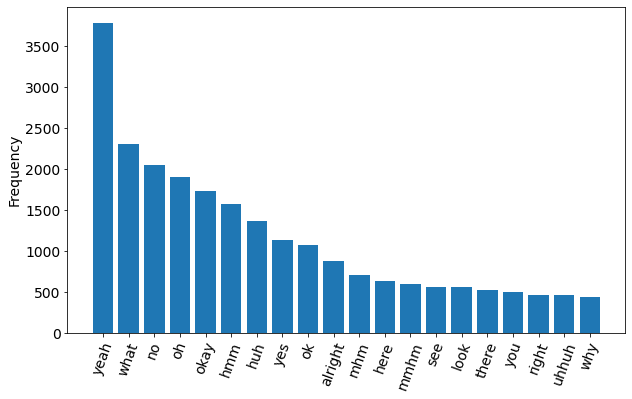

In [ ]:
#Histogram of most frequent words
words = [word for word, _ in counts][:20][::-1]
counts = [counts for _, counts in counts][:20][::-1]
words.reverse()
counts.reverse()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'right', va = 'center')
plt.rcParams.update({'font.size': 14})
# fig, ax = plt.subplots()
plt.figure(figsize=(10,6))

# plt.barh(words, counts)
# plt.ylabel("Rank")
# plt.xlabel("Frequency")

plt.bar(words, counts)
plt.ylabel("Frequency")
# plt.xlabel("Rank")
plt.xticks(rotation = 70) # Rotates X-Axis Ticks by 45-degrees

# addlabels(counts, words)
# plt.gca().margins(x=-0.000001)

plt.show()

In [ ]:
df_all_sents.ds.value_counts()

tb     185494
uci     28391
br       9790
Name: ds, dtype: int64

In [ ]:
df_sorted_length = df_all_sents.sort_values(by='logprobs_GPT2',)
sents_sorted_length = [" ".join(ast.literal_eval(t))+'\n' for t in df_sorted_length.tokenised]

##Most frequent words

I want it to look like this: https://blogs.sas.com/content/sastraining/2015/11/06/analytics-claim-this-is-the-20th-most-used-word-in-english-writing/

In [ ]:
all_token_lists = [(ast.literal_eval(t)) for t  in list(df_all_sents.tokenised_morphLemma)]
all_tokens_flat = [t for sublist in all_token_lists for t in sublist]

In [ ]:
from collections import Counter
Counter = Counter(all_tokens_flat)
word_freq = Counter.most_common(200)

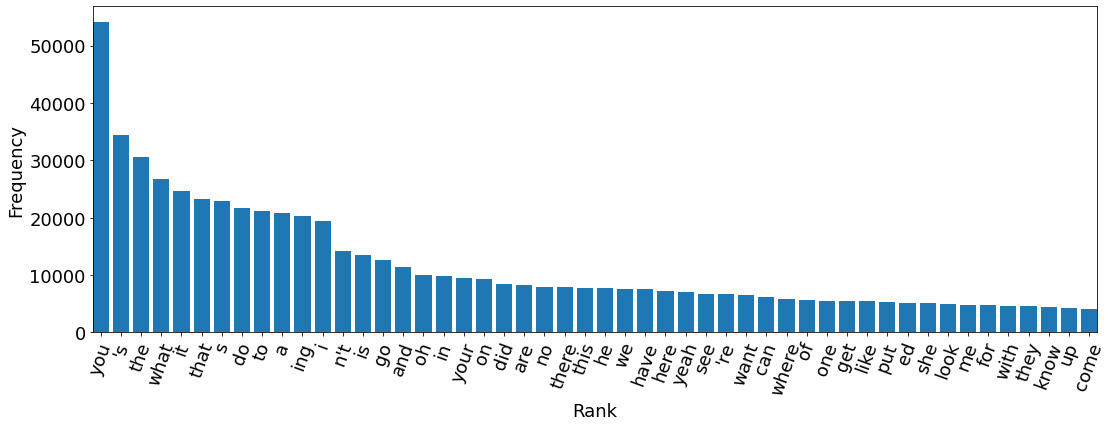

In [ ]:
#Histogram of most frequent words
words = [word for word, _ in word_freq][:50][::-1]
counts = [counts for _, counts in word_freq][:50][::-1]
words.reverse()
counts.reverse()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'right', va = 'center')
plt.rcParams.update({'font.size': 18})
# fig, ax = plt.subplots()
plt.figure(figsize=(18, 6))

# plt.barh(words, counts)
# # plt.title("50 most frequent tokens in corpus")
# plt.ylabel("Rank")
# plt.xlabel("Frequency")
plt.bar(words, counts)
# plt.title("50 most frequent tokens in corpus")
plt.ylabel("Frequency")
plt.xlabel("Rank")
plt.xticks(rotation = 70) # Rotates X-Axis Ticks by 45-degrees

# addlabels(counts, words)
plt.gca().margins(x=-0.000001)

plt.show()

In [ ]:
all_token_lists_reg = [(ast.literal_eval(t)) for t  in list(df_all_sents.tokenised)]
all_tokens_flat_reg = [t for sublist in all_token_lists_reg for t in sublist]

In [ ]:
from collections import Counter
Counter = Counter(all_tokens_flat_reg)
word_freq_reg= Counter.most_common(200)

In [ ]:
#Histogram of most frequent words
words = [word for word, _ in word_freq][:50]
counts = [counts for _, counts in word_freq][:50]
words.reverse()
counts.reverse()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'right', va = 'center')

# fig, ax = plt.subplots()
plt.figure(figsize=(6, 12))

plt.barh(words, counts)
# plt.title("50 most frequent tokens in corpus")
plt.ylabel("Rank")
plt.xlabel("Frequency")
# addlabels(counts, words)
plt.gca().margins(y=-0.00005)

plt.show()

##BLC check if in corpus

In [ ]:
blc_nouns_raw = "cornet	sax	underwear	measles	airplane	guitar	racket	movie	place_mat	sword	sofa	ant	termite	motorcycle	hotel	shirt	apartment	museum	fern	necklace	television_program	spoon	tea	sodium_carbonate	pear	pepper	peach	pen	cat	saw	flower	newspaper	fork	dog	bird	grape	necktie	butterfly	radish	tent	coffee	chair	net	dressing_table	boot	cup	skate	paper	alcohol	plate	truck	cow	bean	drum	magazine	onion	tree	bus	horse	weight	knife	novel	potato	lamp	drill	sock	milk	piano	ring	bloomers	gun	citation	scarf	pencil	apple	bed	fish	ball	bomb	mouse	shoe	hammer	table	grain	bread	watch	"

In [ ]:
blc_nouns = blc_nouns_raw.split()

In [ ]:
len(blc_nouns)

86

In [ ]:
in_corpus = [False]*len(blc_nouns)

In [ ]:
for i in range(len(blc_nouns)):
  if blc_nouns[i] in all_tokens_flat:
    in_corpus[i] = True


In [ ]:
noun_in_coprus = dict(zip(blc_nouns, in_corpus))

In [ ]:
counts =  [all_tokens_flat.count(n) for n in blc_nouns]

In [ ]:
noun_counts = dict(zip(blc_nouns, counts))

In [ ]:
noun_counts_nonzero = [n for n in blc_nouns if noun_counts[n]>0]

In [ ]:
swadesh_verbs_raw = "drink	eat	bite	suck	spit	vomit	blow	breathe	laugh	see	hear	know	think	smell	fear	sleep	live	die	kill	fight	hunt	hit	cut	split	stab	scratch	dig	swim	fly	walk	come	lie	sit	stand	turn	fall	give	hold	squeeze	rub	wash	wipe	pull	push	throw	tie	sew	count	say	sing	play	float	flow	freeze	swell"

In [ ]:
swadesh_verbs = swadesh_verbs_raw.split()

In [ ]:
counts_v =  [all_tokens_flat.count(v) for v in swadesh_verbs]

In [ ]:
verb_counts = dict(zip(swadesh_verbs, counts_v))
verb_counts_nonzero = [v for v in swadesh_verbs if verb_counts[v]>0]

In [ ]:
print (verb_counts_nonzero)

['drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight', 'hunt', 'hit', 'cut', 'split', 'scratch', 'dig', 'swim', 'fly', 'walk', 'come', 'lie', 'sit', 'stand', 'turn', 'fall', 'give', 'hold', 'squeeze', 'rub', 'wash', 'wipe', 'pull', 'push', 'throw', 'tie', 'sew', 'count', 'say', 'sing', 'play', 'float', 'freeze', 'swell']


In [ ]:
print(noun_counts_nonzero)

['underwear', 'measles', 'airplane', 'guitar', 'racket', 'movie', 'sword', 'sofa', 'ant', 'motorcycle', 'hotel', 'shirt', 'apartment', 'museum', 'necklace', 'spoon', 'tea', 'pear', 'pepper', 'peach', 'pen', 'cat', 'saw', 'flower', 'newspaper', 'fork', 'dog', 'bird', 'grape', 'necktie', 'butterfly', 'radish', 'tent', 'coffee', 'chair', 'net', 'boot', 'cup', 'skate', 'paper', 'plate', 'truck', 'cow', 'bean', 'drum', 'magazine', 'onion', 'tree', 'bus', 'horse', 'weight', 'knife', 'novel', 'potato', 'lamp', 'drill', 'sock', 'milk', 'piano', 'ring', 'gun', 'scarf', 'pencil', 'apple', 'bed', 'fish', 'ball', 'bomb', 'mouse', 'shoe', 'hammer', 'table', 'grain', 'bread', 'watch']


##Brown separation

In [ ]:
all_brown  = ['progressive',	'prep_in', 'prep_on', 'reg_plural', 'irreg_past', 'poss', 'uncontr_copula',	'articles',	'reg_past',	'reg_3rd',	'irreg_3rd',	'uncontr_aux',	'contr_copula', 'contr_aux']

In [ ]:
no_brown = df_all_sents[(df_all_sents.progressive==0) & (df_all_sents.prep_on==0) & (df_all_sents.prep_in==0) & (df_all_sents.irreg_past==0) & (df_all_sents.poss==0) & (df_all_sents.uncontr_copula==0) & (df_all_sents.articles==0) & (df_all_sents.reg_past==0) & (df_all_sents.reg_3rd==0) & (df_all_sents.irreg_3rd==0) & (df_all_sents.uncontr_aux==0) & (df_all_sents.contr_copula==0) & (df_all_sents.contr_aux==0) & (df_all_sents.reg_plural==0)]

In [ ]:
sents_no_brown = [" ".join(ast.literal_eval(t))+'\n' for t in list(no_brown.tokenised_morphLemma)]
print(len(sents_no_brown))

102828


In [ ]:
start = 102828
sents_brown_morphs = []
for b in all_brown:
  df_b = df_all_sents[df_all_sents[b] == 1]
  sents_b = [" ".join(ast.literal_eval(t))+'\n' for t in list(df_b.tokenised_morphLemma)]
  sents_brown_morphs.append(sents_b)
  end = start+len(sents_b)
  print(b, len(sents_b), start, end)
  start = end

progressive 19653 102828 122481
prep_in 7811 122481 130292
prep_on 6613 130292 136905
reg_plural 16668 136905 153573
irreg_past 20384 153573 173957
poss 4295 173957 178252
uncontr_copula 17862 178252 196114
articles 46069 196114 242183
reg_past 5100 242183 247283
reg_3rd 4539 247283 251822
irreg_3rd 5032 251822 256854
uncontr_aux 6929 256854 263783
contr_copula 23205 263783 286988
contr_aux 8257 286988 295245


In [ ]:
sents_brown_morphs_flat = [s for sublist in sents_brown_morphs for s in sublist]
all_sents = sents_no_brown + sents_brown_morphs_flat


In [ ]:
f = open('drive/My Drive/Colab Notebooks/sents_Brown_order.txt', "w")
f.writelines(all_sents)
f.close()

In [ ]:
import random
random.shuffle(all_sents)
f = open('drive/My Drive/Colab Notebooks/sents_Brown_shuffled.txt', "w")
f.writelines(all_sents)
f.close()

##STATS

In [ ]:
all_token_lists_morph = [(ast.literal_eval(t)) for t  in list(df_all_sents.tokenised_morphLemma)]
all_tokens_flat_morph = [t for sublist in all_token_lists_morph for t in sublist]
len(all)
all_token_lists_reg= [(ast.literal_eval(t)) for t  in list(df_all_sents.tokenised)]
all_tokens_flat_reg = [t for sublist in all_token_lists_reg for t in sublist]

###Length

In [ ]:
tokenised_sents = [[token.text for token in ] for sent in all_sents]

In [ ]:
words_incl_punct = sum( [ len(sent) for sent in tokenised_sents])

In [ ]:
words_no_punct = sum( [ len([w for w in sent if w not in string.punctuation]) for sent in tokenised_sents])

In [ ]:
print(len(all_tokens_flat_reg), len(all_tokens_flat_morph))

993078 1041541


###Sentence length

In [ ]:
import statistics

In [ ]:
statistics.mean([ len(sent) for sent in all_token_lists_reg]), statistics.stdev([ len(sent) for sent in all_token_lists_reg])

(4.439825639879289, 3.124675530210154)

In [ ]:
statistics.mean([ len(sent) for sent in all_token_lists_morph]), statistics.stdev([ len(sent) for sent in all_token_lists_morph])

(4.6564926791103165, 3.320591560313975)

In [ ]:
statistics.mean([ len([w for w in sent if w not in string.punctuation]) for sent in tokenised_sents]), statistics.stdev([ len([w for w in sent if w not in string.punctuation]) for sent in tokenised_sents])

(5.448484060943859, 3.1988084892630853)

Vocab

In [ ]:
vocab_incl_punct = set([w for sent in tokenised_sents for w in sent])
# [item for sublist in t for item in sublist]

In [ ]:
len(set(all_tokens_flat_morph))

10081

In [ ]:
len(set(all_tokens_flat_reg))

12026

In [ ]:
vocab_no_punct = set([w for sent in tokenised_sents for w in sent if w not in string.punctuation])


In [ ]:
vocab_lowercase = set([w.lower() for w in vocab_no_punct])

In [ ]:
print(len(vocab_incl_punct), len(vocab_no_punct), len(vocab_lowercase))

12617 12607 11984


In [ ]:
vocab_lowercase

##Order sents by length and save as raw sents and as parses


In [ ]:
df_all_sents.simple_length.value_counts()

1     46643
4     31550
3     29850
5     25793
2     22006
6     20082
7     14848
8     10462
9      7244
10     4707
11     3159
12     2297
13     1695
14     1284
15      815
16      429
17      237
18      137
19      118
20       75
21       57
22       56
23       39
24       35
26       17
27       15
25       15
28       10
Name: simple_length, dtype: int64

In [ ]:
df_sorted_length = df_all_sents.sort_values(by='simple_length',)
sents_sorted_length = [" ".join(ast.literal_eval(t))+'\n' for t in df_sorted_length.tokenised]
parses_sorted_length = [p+'\n' for p in df_sorted_length.parses_PCFG]

In [ ]:
f = open("drive/My Drive/Colab Notebooks/all_sents_reverseSorted_length.raw", "w")
f.writelines(sents_sorted_length[::-1])
f.close()

##Order sents by length and save as raw sents and as parses


In [ ]:
df_sorted_length = df_all_sents.sort_values(by='logprobs_GPT2',)
sents_sorted_length = [" ".join(ast.literal_eval(t))+'\n' for t in df_sorted_length.tokenised]
parses_sorted_length = [p+'\n' for p in df_sorted_length.parses_PCFG]
f = open("drive/My Drive/Colab Notebooks/all_sents_reverseSorted_logprobs.raw", "w")
f.writelines(sents_sorted_length)
f.close()

In [ ]:
f = open("drive/My Drive/Colab Notebooks/all_sents_sorted_logprobs.raw", "w")
f.writelines(sents_sorted_length[::-1])
f.close()

In [ ]:
#shuffled
import random
random.shuffle(sents_sorted_length)
print(sents_sorted_length[:10])
f = open("drive/My Drive/Colab Notebooks/all_sents_shuffled.raw", "w")
f.writelines(sents_sorted_length)
f.close()

["you take paul 's turn because he ca n't do that\n", 'you\n', 'my this is a big bed\n', 'yes\n', 'huh\n', 'is that so\n', 'oh\n', "let 's get out of the bathroom\n", 'big muscles oh yeah baby\n', 'yes\n']


##Parses written to file

In [ ]:
parses = list(df_all_sents.parses_PCFG[df_all_sents.parses_PCFG!='(())'])
parses = [p + '\n' for p in parses]

In [ ]:
len(parses)

221894

In [ ]:
parses[2]

'( (PRN (CC and) (NP (DT a) (NN doggie))) )\n'

In [ ]:
f = open("drive/My Drive/Colab Notebooks/all_sents_berkleyPCFG_parses_nonempty.mrg", "w")
f.writelines(parses)
f.close()

##Feature counts

In [ ]:
excl_cols = {'index', 'ds', 'orig', 'low', 'low_nopunct',	'tokenised'}
for col in df_all_sents.columns:
  if col not in excl_cols:
    print(col)
    print(df_all_sents[col].value_counts())
    print('\n')

In [ ]:
df_all_sents['simple_length'].value_counts()

1     46643
4     31550
3     29850
5     25793
2     22006
6     20082
7     14848
8     10462
9      7244
10     4707
11     3159
12     2297
13     1695
14     1284
15      815
16      429
17      237
18      137
19      118
20       75
21       57
22       56
23       39
24       35
26       17
27       15
25       15
28       10
Name: simple_length, dtype: int64

## Remove sents whose length>28 or 0


In [ ]:
df_all_sents = df_all_sents[df_all_sents.simple_length<29]
df_all_sents = df_all_sents[df_all_sents.simple_length>0]

In [ ]:
df_all_sents

,Unnamed: 0,index,ds,orig,low,low_nopunct,tokenised,simple_length,progressive,prep_on,...,uncontr_copula,articles,reg_past,reg_3rd,irreg_3rd,uncontr_aux,contr_copula,contr_aux,logprobs_GPT2,parses_PCFG
0,0,0,br,you want to see the book,you want to see the book,you want to see the book,"['you', 'want', 'to', 'see', 'the', 'book']",6,0,0,...,0,1,0,0,0,0,0,0,-37.673693,( (S (NP (PRP you)) (VP (VBP want) (S (VP (TO ...
1,1,1,br,look there's a boy with his hat,look there's a boy with his hat,look there's a boy with his hat,"['look', 'there', ""'s"", 'a', 'boy', 'with', 'h...",8,0,0,...,0,1,0,0,0,0,0,0,-54.486391,( (SQ (VBP look) (NP (EX there)) (SQ (VP (VBZ ...
2,2,2,br,and a doggie,and a doggie,and a doggie,"['and', 'a', 'doggie']",3,0,0,...,0,1,0,0,0,0,0,0,-36.583510,( (PRN (CC and) (NP (DT a) (NN doggie))) )
3,3,3,br,you want to look at this,you want to look at this,you want to look at this,"['you', 'want', 'to', 'look', 'at', 'this']",6,0,0,...,0,0,0,0,0,0,0,0,-35.220573,( (S (NP (PRP you)) (VP (VBP want) (S (VP (TO ...
4,4,4,br,look at this,look at this,look at this,"['look', 'at', 'this']",3,0,0,...,0,0,0,0,0,0,0,0,-29.499416,( (S (VP (VB look) (PP (IN at) (NP (DT this)))...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225213,225262,187081,tb,"that's a funny place to put a mirror, isn't it?","that's a funny place to put a mirror, isn't it?",that's a funny place to put a mirror isn't it,"['that', ""'s"", 'a', 'funny', 'place', 'to', 'p...",12,0,0,...,0,1,0,0,0,0,1,0,-62.774726,( (S (NP (DT that)) (VP (VBZ 's) (NP (NP (DT a...
225214,225263,187082,tb,what is that man doing?,what is that man doing?,what is that man doing,"['what', 'is', 'that', 'man', 'doing']",5,1,0,...,1,0,0,0,0,0,0,0,-40.428445,( (SBARQ (WHNP (WP what)) (SQ (VBZ is) (NP (DT...
225215,225264,187083,tb,he's sitting on a boat?,he's sitting on a boat?,he's sitting on a boat,"['he', ""'s"", 'sitting', 'on', 'a', 'boat']",6,1,1,...,0,1,0,0,0,0,0,1,-46.448860,( (S (NP (PRP he)) (VP (VBZ 's) (VP (VBG sitti...
225216,225265,187084,tb,where is he sitting on a boat?,where is he sitting on a boat?,where is he sitting on a boat,"['where', 'is', 'he', 'sitting', 'on', 'a', 'b...",7,1,1,...,0,1,0,0,0,1,0,0,-48.029878,( (SBARQ (WHADVP (WRB where)) (SQ (VBZ is) (NP...


In [ ]:
df_all_sents = df_all_sents.drop(columns = ["Unnamed: 0", "index"])

In [ ]:
df_all_sents.reset_index(inplace=True)

In [ ]:
df_all_sents.drop(columns = ["level_0", "index"], inplace=True)

In [ ]:
df_all_sents.to_csv(r'drive/My Drive/Colab Notebooks/df_all_sent.csv', index = False)

In [ ]:
df_all_sents

,ds,orig,low,low_nopunct,tokenised,simple_length,progressive,prep_on,prep_in,irreg_past,...,uncontr_copula,articles,reg_past,reg_3rd,irreg_3rd,uncontr_aux,contr_copula,contr_aux,logprobs_GPT2,parses_PCFG
0,br,you want to see the book,you want to see the book,you want to see the book,"['you', 'want', 'to', 'see', 'the', 'book']",6,0,0,0,0,...,0,1,0,0,0,0,0,0,-37.673693,( (S (NP (PRP you)) (VP (VBP want) (S (VP (TO ...
1,br,look there's a boy with his hat,look there's a boy with his hat,look there's a boy with his hat,"['look', 'there', ""'s"", 'a', 'boy', 'with', 'h...",8,0,0,0,0,...,0,1,0,0,0,0,0,0,-54.486391,( (SQ (VBP look) (NP (EX there)) (SQ (VP (VBZ ...
2,br,and a doggie,and a doggie,and a doggie,"['and', 'a', 'doggie']",3,0,0,0,0,...,0,1,0,0,0,0,0,0,-36.583510,( (PRN (CC and) (NP (DT a) (NN doggie))) )
3,br,you want to look at this,you want to look at this,you want to look at this,"['you', 'want', 'to', 'look', 'at', 'this']",6,0,0,0,0,...,0,0,0,0,0,0,0,0,-35.220573,( (S (NP (PRP you)) (VP (VBP want) (S (VP (TO ...
4,br,look at this,look at this,look at this,"['look', 'at', 'this']",3,0,0,0,0,...,0,0,0,0,0,0,0,0,-29.499416,( (S (VP (VB look) (PP (IN at) (NP (DT this)))...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223670,tb,"that's a funny place to put a mirror, isn't it?","that's a funny place to put a mirror, isn't it?",that's a funny place to put a mirror isn't it,"['that', ""'s"", 'a', 'funny', 'place', 'to', 'p...",12,0,0,0,0,...,0,1,0,0,0,0,1,0,-62.774726,( (S (NP (DT that)) (VP (VBZ 's) (NP (NP (DT a...
223671,tb,what is that man doing?,what is that man doing?,what is that man doing,"['what', 'is', 'that', 'man', 'doing']",5,1,0,0,0,...,1,0,0,0,0,0,0,0,-40.428445,( (SBARQ (WHNP (WP what)) (SQ (VBZ is) (NP (DT...
223672,tb,he's sitting on a boat?,he's sitting on a boat?,he's sitting on a boat,"['he', ""'s"", 'sitting', 'on', 'a', 'boat']",6,1,1,0,0,...,0,1,0,0,0,0,0,1,-46.448860,( (S (NP (PRP he)) (VP (VBZ 's) (VP (VBG sitti...
223673,tb,where is he sitting on a boat?,where is he sitting on a boat?,where is he sitting on a boat,"['where', 'is', 'he', 'sitting', 'on', 'a', 'b...",7,1,1,0,0,...,0,1,0,0,0,1,0,0,-48.029878,( (SBARQ (WHADVP (WRB where)) (SQ (VBZ is) (NP...


In [ ]:
sents =[ " ".join(ast.literal_eval(t)) for t in list(df_all_sents.tokenised)]

In [ ]:
len(sents)

223675

## Get tokenised sents for berkley parser

In [ ]:
tokenised_sents_str = [" ".join(ast.literal_eval(s))+'\n' for s in (df_all_sents.tokenised)]

In [ ]:
tokenised_sents_str[1]

"look there 's a boy with his hat\n"

In [ ]:
len(tokenised_sents_str)

223675

In [ ]:
newfilepath = 'drive/My Drive/Colab Notebooks/all_sents_tokenised.txt'
file1 = open(newfilepath, 'w')
file1.writelines(tokenised_sents_str)
file1.close()

## Add berkley PCFG parses to the csv

In [ ]:
file1 = open('drive/My Drive/Colab Notebooks/all_sents_berkleyPCFG_parses.txt', 'r')
parses = file1.readlines()
file1.close()
parses = [parse.strip() for parse in parses]

In [ ]:
parses[3]

'( (S (NP (PRP you)) (VP (VBP want) (S (VP (TO to) (VP (VB look) (PP (IN at) (NP (DT this)))))))) )'

In [ ]:
df_all_sents['parses_PCFG'] = parses

In [ ]:
df_all_sents.to_csv(r'drive/My Drive/Colab Notebooks/df_all_sent.csv', index=False)

##Extract features from tree strings

In [ ]:
from nltk import *

In [ ]:
tree = Tree.fromstring(parses[1])
print(tree)
ptree = ParentedTree.convert(tree)

(
  (SQ
    (VBP look)
    (NP (EX there))
    (SQ
      (VP
        (VBZ 's)
        (NP
          (NP (DT a) (NN boy))
          (PP (IN with) (NP (PRP$ his) (NN hat))))))))


In [ ]:
for subtree in ptree.subtrees():
  print(subtree)
  # print('  Right Sibling = %s' % subtree.parent())
  print('  Left Sibling  = %s' % subtree.left_sibling())
  print('  Right Sibling = %s' % subtree.right_sibling())

(
  (SQ
    (VBP look)
    (NP (EX there))
    (SQ
      (VP
        (VBZ 's)
        (NP
          (NP (DT a) (NN boy))
          (PP (IN with) (NP (PRP$ his) (NN hat))))))))
  Left Sibling  = None
  Right Sibling = None
(SQ
  (VBP look)
  (NP (EX there))
  (SQ
    (VP
      (VBZ 's)
      (NP
        (NP (DT a) (NN boy))
        (PP (IN with) (NP (PRP$ his) (NN hat)))))))
  Left Sibling  = None
  Right Sibling = None
(VBP look)
  Left Sibling  = None
  Right Sibling = (NP (EX there))
(NP (EX there))
  Left Sibling  = (VBP look)
  Right Sibling = (SQ
  (VP
    (VBZ 's)
    (NP (NP (DT a) (NN boy)) (PP (IN with) (NP (PRP$ his) (NN hat))))))
(EX there)
  Left Sibling  = None
  Right Sibling = None
(SQ
  (VP
    (VBZ 's)
    (NP (NP (DT a) (NN boy)) (PP (IN with) (NP (PRP$ his) (NN hat))))))
  Left Sibling  = (NP (EX there))
  Right Sibling = None
(VP
  (VBZ 's)
  (NP (NP (DT a) (NN boy)) (PP (IN with) (NP (PRP$ his) (NN hat)))))
  Left Sibling  = None
  Right Sibling = None
(VBZ 's)
  L

In [ ]:
ptree[0:3]

[ParentedTree('SQ', [ParentedTree('VBP', ['look']), ParentedTree('NP', [ParentedTree('EX', ['there'])]), ParentedTree('SQ', [ParentedTree('VP', [ParentedTree('VBZ', ["'s"]), ParentedTree('NP', [ParentedTree('NP', [ParentedTree('DT', ['a']), ParentedTree('NN', ['boy'])]), ParentedTree('PP', [ParentedTree('IN', ['with']), ParentedTree('NP', [ParentedTree('PRP$', ['his']), ParentedTree('NN', ['hat'])])])])])])])]

##Added simple length calc

In [ ]:
df_all_sents['simple_length'] = [len(ast.literal_eval(tokenised_list)) for tokenised_list in df_all_sents.tokenised]

In [ ]:
df_all_sents['simple_length'].value_counts()

NameError: ignored

#Brown order features

###Stage II

In [ ]:
#present progressive -ing
def is_progressive(token):
  if token.morph.get('Aspect') == ['Prog'] and token.lower_[-3:] == 'ing':
    return True
  else:
    return False

assert(is_progressive(nlp("We are dining.")[2]))


In [ ]:
#prep in
def is_in(token):
  if token.tag_ == 'IN' and token.lower_ == 'in':
    return True
  else:
    return False

assert(is_in(nlp("The truck is in the box.")[3]))


In [ ]:
#prep on
def is_on(token):
  if token.tag_ == 'IN' and token.lower_ == 'on':
    return True
  else:
    return False

assert(is_on(nlp("The truck is on the table.")[3]))

In [ ]:
#regular plurals (-s)
def is_reg_plural(token):
  plural_only = {'binoculars', 'headphones', 'sunglasses', 'glasses',
                 'scissors', 'tweezers', 'jeans', 'pyjamas', 'tights',
                 'knickers', 'shorts', 'trousers', 'pants', 'belongings',
                 'outskirts', 'clothes', 'premises', 'congratulations',
                 'savings', 'earnings', 'stairs', 'goods', 'surroundings',
                 'thanks'}
  if token.tag_ == 'NNS' and token.lower_[-1] == 's' and token.lower_ not in plural_only:
    return True
  else:
    return False

assert(is_reg_plural(nlp("The trucks are on the table.")[1]))
assert(not is_reg_plural(nlp("The women are on the table.")[1]))
assert(not is_reg_plural(nlp("The scissors are on the table.")[1]) )

###Stage III

In [ ]:
#irregular past tense, excluding be
def is_irregular_past(token):
  if token.morph.get('Tense') == ['Past'] and token.lower_[-2:] != 'ed' and token.lemma_!='be':
    return True
  else:
    return False

assert(is_irregular_past(nlp("We went skiing.")[1]))
assert(not is_irregular_past(nlp("We played volleyball.")[1]))

In [ ]:
#possessive 's
def is_poss(token):
  if token.tag_ == 'POS': # and token.lower_ == "'s"
    return True
  else:
    return False

assert(is_poss(nlp("Jim's jacket is here.")[1]))
assert(not is_poss(nlp("He's here.")[1]))


In [ ]:
#uncontractible copula: full form of verb to be when main verb in sent
#Maybe do for entire sent, get dep, check root and if nto be verb move on?
def is_uncontr_copula(token):
  if token.tag_[0]== 'V' and token.dep_ == "ROOT" and token.lemma_ == 'be' and token.lower_[0]!="'":
    return True
  else:
    return False

assert(is_uncontr_copula(nlp("Jim is here.")[1]))
assert(not is_uncontr_copula(nlp("He's here.")[1]))
assert(is_uncontr_copula(nlp("They are here.")[1]))
assert(not is_uncontr_copula(nlp("He is swimming.")[1]))

###Stage IV

In [ ]:
#articles
article_set = {'a', 'the'}
def is_article(token):
  if token.tag_ == 'DT' and token.lower_ in article_set:
    return True
  else:
    return False

assert(is_article(nlp("The dog is here.")[0]))
assert(is_article(nlp("I have a dog.")[2]))
assert( is_article(nlp("you want to see the book")[4]))

In [ ]:
#regular past tense
def is_regular_past(token):
  if token.morph.get('Tense') == ['Past'] and token.lower_[-2:] == 'ed':
    return True
  else:
    return False

assert(not is_regular_past(nlp("We went skiing.")[1]))
assert(is_regular_past(nlp("We played volleyball.")[1]))

In [ ]:
#3rd person present regular (-s)
irregular_3rd_person_verbs = {'be', 'have', 'go', 'do'}
def is_regular_3rd_present(token):
  if token.morph.get('Tense') == ['Pres'] and token.morph.get('Person') == ['3'] and token.morph.get('Number') == ['Sing'] and token.lemma_ not in irregular_3rd_person_verbs and token.lower_[-1] == 's':
    return True
  else:
    return False

assert(not is_regular_3rd_present(nlp("She goes skiing.")[1]))
assert(is_regular_3rd_present(nlp("She likes skiing.")[1]))



### Stage V

In [ ]:
#3rd person present irregular, excluding be
irregular_3rd_person_verbs_nobe = {'have', 'go', 'do'}
def is_irregular_3rd_present(token):
  if token.morph.get('Tense') == ['Pres'] and token.morph.get('Person') == ['3'] and token.morph.get('Number') == ['Sing'] and token.lemma_ in irregular_3rd_person_verbs_nobe:
    return True
  else:
    return False

assert(is_irregular_3rd_present(nlp("She goes skiing.")[1]))
assert(not is_irregular_3rd_present(nlp("She likes skiing.")[1]))

In [ ]:
#uncontractible auxiliary: full form of verb to be when auxiliary verb in a sentence
#Maybe do for entire sent, get dep, check root and if nto be verb move on?
def is_uncontr_aux(token):
  if token.tag_[0]== 'V' and token.dep_ == "aux" and token.lemma_ == 'be' and token.lower_[0]!="'":
    return True
  else:
    return False

assert(not is_uncontr_aux(nlp("Jim is here.")[1]))
assert(not is_uncontr_aux(nlp("He's here.")[1]))
assert(not is_uncontr_aux(nlp("They are here.")[1]))
assert(is_uncontr_aux(nlp("He is swimming.")[1]))
assert(is_uncontr_aux(nlp("Are they learning?")[0]))

In [ ]:
#contractible copula: shortened form of verb to be when main verb in sent
#Maybe do for entire sent, get dep, check root and if nto be verb move on?
def is_contr_copula(token,parse):
  index = parse.find("(VBZ 's)")
  if token.tag_[0]== 'V' and token.dep_ == "ROOT" and token.lemma_ == 'be' and token.lower_[0]=="'" or (parse) :
    return True
  else:
    return False

assert(not is_contr_copula(nlp("Jim is here.")[1]))
assert(is_contr_copula(nlp("He's here.")[1]))
assert(not is_contr_copula(nlp("They are here.")[1]))
assert( is_contr_copula(nlp("I'm ready.")[1]))
assert(not is_contr_copula(nlp("He is swimming.")[1]))

NameError: name 'nlp' is not defined

In [ ]:
#contractible auxiliary: shortened form of verb to be when auxiliary verb in a sentence
#Maybe do for entire sent, get dep, check root and if nto be verb move on?
def is_contr_aux(token):
  if token.tag_[0]== 'V' and token.lemma_ == 'be' and token.lower_[0]=="'" and (token.dep_ == "aux" or token.dep_ == "case"):
    return True
  else:
    return False

assert(not is_contr_aux(nlp("Jim is here.")[1]))
assert(not is_contr_aux(nlp("He's here.")[1]))
assert(not is_contr_aux(nlp("They are here.")[1]))
assert(not is_contr_aux(nlp("He is swimming.")[1]))
assert( is_contr_aux(nlp("I'm swimming.")[1]))
assert( is_contr_aux(nlp("He's swimming.")[1]))
assert( is_contr_aux(nlp("They're swimming.")[1]))

#Adding Brown order analysis to df

In [ ]:
sents = list(df_all_sents['orig'])
num = len(sents)
progressive = [0]*num
prep_on = [0]*num
prep_in = [0]*num
reg_plural = [0]*num
irreg_past = [0]*num
poss = [0]*num
uncontr_copula= [0]*num
articles= [0]*num
reg_past =  [0]*num
reg_3rd  = [0]*num
irreg_3rd =  [0]*num
uncontr_aux= [0]*num
contr_copula= [0]*num
contr_aux= [0]*num

In [ ]:
for i in range(num):
  if i%100 == 0: print('Iteration: ', i, '/', num)
  sent = sents[i]
  doc = nlp(sent)
  progressive[i] = int(any([is_progressive(t) for t in doc]))
  prep_on[i] = int(any([is_on(t) for t in doc]))
  prep_in[i] = int(any([is_in(t) for t in doc]))
  reg_plural[i] = int(any([is_reg_plural(t) for t in doc]))
  irreg_past[i] = int(any([is_irregular_past(t) for t in doc]))
  poss[i] = int(any([is_poss(t) for t in doc]))
  uncontr_copula[i] = int(any([is_uncontr_copula(t) for t in doc]))
  articles[i] = int(any([is_article(t) for t in doc]))
  reg_past[i] = int(any([is_regular_past(t) for t in doc]))
  reg_3rd[i] = int(any([is_regular_3rd_present(t) for t in doc]))
  irreg_3rd[i] = int(any([is_irregular_3rd_present(t) for t in doc]))
  uncontr_aux[i] = int(any([is_uncontr_aux(t) for t in doc]))
  contr_copula[i] = int(any([is_contr_copula(t) for t in doc]))
  contr_aux[i] = int(any([is_contr_aux(t) for t in doc]))

In [ ]:
df_all_sents['progressive'] = progressive
df_all_sents['prep_on'] = prep_on
df_all_sents['prep_in'] = prep_in
df_all_sents['irreg_past'] = irreg_past
df_all_sents['poss'] = poss
df_all_sents['uncontr_copula'] = uncontr_copula
df_all_sents['articles'] = articles
df_all_sents['reg_past'] = reg_past
df_all_sents['reg_3rd'] = reg_3rd
df_all_sents['irreg_3rd'] = irreg_3rd
df_all_sents['uncontr_aux'] = uncontr_aux
df_all_sents['contr_copula'] = contr_copula
df_all_sents['contr_aux'] = contr_aux

In [ ]:
df_all_sents

In [ ]:
df_all_sents.to_csv(r'drive/My Drive/Colab Notebooks/df_all_sent.csv', index=False)

##Forgotten Brown regular plural!!!

In [ ]:
sents = list(df_all_sents['orig'])
num = len(sents)
reg_plural = [0]*num
for i in range(num):
  if i%100 == 0: print('Iteration: ', i, '/', num)
  sent = sents[i]
  doc = nlp(sent)
  reg_plural[i] = int(any([is_reg_plural(t) for t in doc]))
df_all_sents['reg_plural'] = reg_plural
df_all_sents.to_csv(r'drive/My Drive/Colab Notebooks/df_all_sent.csv', index=False)

Iteration:  0 / 223675
Iteration:  100 / 223675
Iteration:  200 / 223675
Iteration:  300 / 223675
Iteration:  400 / 223675
Iteration:  500 / 223675
Iteration:  600 / 223675
Iteration:  700 / 223675
Iteration:  800 / 223675
Iteration:  900 / 223675
Iteration:  1000 / 223675
Iteration:  1100 / 223675
Iteration:  1200 / 223675
Iteration:  1300 / 223675
Iteration:  1400 / 223675
Iteration:  1500 / 223675
Iteration:  1600 / 223675
Iteration:  1700 / 223675
Iteration:  1800 / 223675
Iteration:  1900 / 223675
Iteration:  2000 / 223675
Iteration:  2100 / 223675
Iteration:  2200 / 223675
Iteration:  2300 / 223675
Iteration:  2400 / 223675
Iteration:  2500 / 223675
Iteration:  2600 / 223675
Iteration:  2700 / 223675
Iteration:  2800 / 223675
Iteration:  2900 / 223675
Iteration:  3000 / 223675
Iteration:  3100 / 223675
Iteration:  3200 / 223675
Iteration:  3300 / 223675
Iteration:  3400 / 223675
Iteration:  3500 / 223675
Iteration:  3600 / 223675
Iteration:  3700 / 223675
Iteration:  3800 / 22367

#Spacy morphemes

In [ ]:
doc = nlp("you want to see the book")
# print([is_article(t) for t in doc])
# any([is_article(t) for t in doc])

In [ ]:
# from spacy.morphology import Morphology
# from spacy.strings import StringStore
# morphology = Morphology(StringStore(["who was in that boat"]))
# from spacy.pipeline.morphologizer import DEFAULT_MORPH_MODEL
# config = {"model": DEFAULT_MORPH_MODEL}
# nlp = spacy.load(en_core_web_sm)
# nlp.add_pipe("morphologizer", config=config)
# doc = nlp("who was in that boat")
# for t in nlp:
#   print(t.morph)
#"I am going to the ball and he's coming too and we are on it"
#"Skiing is my favorite sport."
# doc = nlp("look there's a boy with his hat. This is Jim's car. He's in the gym. Jim's here. The trucks are on the table. The feet are in. Hold on to your wallet. She went skiing,")
# doc = nlp("He's swimming. He's here. Jim's dog is here.She likes skiing. Is it Alison? Yes, it is. Was it Alison? Yes, it was. Are they swimming? Were you hungry? I'm not laughing; she is. She was laughing; not me. She's ready. They're here. Daddy's got tomatoes. My dog's lost his collar")
doc = nlp("The boy is playing. My cars are blue. We danced. The puppy likes you.")
for t in doc:
  print(t, t.tag_, t.pos_, t.dep_ , t.lemma_, t.morph, )

doc[2].morph.get('Aspect')
# morphologizer = nlp.add_pipe("morphologizer")
# This usually happens under the hood
# processed = morphologizer(doc)

The DT DET det the Definite=Def|PronType=Art
boy NN NOUN nsubj boy Number=Sing
is VBZ AUX aux be Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
playing VBG VERB ROOT play Aspect=Prog|Tense=Pres|VerbForm=Part
. . PUNCT punct . PunctType=Peri
My PRP$ PRON poss my Number=Sing|Person=1|Poss=Yes|PronType=Prs
cars NNS NOUN nsubj car Number=Plur
are VBP AUX ROOT be Mood=Ind|Tense=Pres|VerbForm=Fin
blue JJ ADJ acomp blue Degree=Pos
. . PUNCT punct . PunctType=Peri
We PRP PRON nsubj we Case=Nom|Number=Plur|Person=1|PronType=Prs
danced VBD VERB ROOT dance Tense=Past|VerbForm=Fin
. . PUNCT punct . PunctType=Peri
The DT DET det the Definite=Def|PronType=Art
puppy NN NOUN nsubj puppy Number=Sing
likes VBZ VERB ROOT like Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
you PRP PRON dobj you Case=Acc|Person=2|PronType=Prs
. . PUNCT punct . PunctType=Peri


[]

#Spacy morphemic tokenisation

In [ ]:
sents = list(df_all_sents.orig)

In [ ]:
sents_morphStem_tokenised = []

irregular_3rd_person_verbs = {'be', 'have', 'go', 'do'}

for us in sents:
  doc = nlp(us)
  sent = []
  for token in doc:
    if not token.is_punct:
      #progressive ing
      if token.morph.get('Aspect') == ['Prog'] and token.lower_[-3:] == 'ing':
        stem = token.lower_[:-3]
        morpheme = token.lower_[-3:]
        sent.append(stem)
        sent.append(morpheme)
      #regular plurals (-s)
      elif token.tag_ == 'NNS' and token.lower_[-1] == 's' :
        stem = token.lower_[:-1]
        morpheme = token.lower_[-1:]
        sent.append(stem)
        sent.append(morpheme)
      #regular past tense
      elif token.morph.get('Tense') == ['Past'] and token.lower_[-2:] == 'ed':
        stem = token.lower_[:-2]
        morpheme = token.lower_[-2:]
        sent.append(stem)
        sent.append(morpheme)
      #3rd person present regular (-s)
      elif token.morph.get('Tense') == ['Pres'] and token.morph.get('Person') == ['3'] and token.morph.get('Number') == ['Sing'] and token.lemma_ not in irregular_3rd_person_verbs and token.lower_[-1] == 's':
        stem = token.lower_[:-1]
        morpheme = token.lower_[-1:]
        sent.append(stem)
        sent.append(morpheme)
      else:
        sent.append(token.lower_)

  sents_morphStem_tokenised.append(sent)

In [ ]:
df_all_sents['tokenised_morphStem'] = sents_morphStem_tokenised

In [ ]:
df_all_sents.to_csv(r'drive/My Drive/Colab Notebooks/df_all_sent.csv', index=False)

In [ ]:
sents_morphLemma_tokenised = []

irregular_3rd_person_verbs = {'be', 'have', 'go', 'do'}

for us in sents:
  doc = nlp(us)
  sent = []
  for token in doc:
    if not token.is_punct:
      #progressive ing
      if token.morph.get('Aspect') == ['Prog'] and token.lower_[-3:] == 'ing':
        morpheme = token.lower_[-3:]
        sent.append(token.lemma_)
        sent.append(morpheme)
      #regular plurals (-s)
      elif token.tag_ == 'NNS' and token.lower_[-1] == 's' :
        morpheme = token.lower_[-1:]
        sent.append(token.lemma_)
        sent.append(morpheme)
      #regular past tense
      elif token.morph.get('Tense') == ['Past'] and token.lower_[-2:] == 'ed':
        morpheme = token.lower_[-2:]
        sent.append(token.lemma_)
        sent.append(morpheme)
      #3rd person present regular (-s)
      elif token.morph.get('Tense') == ['Pres'] and token.morph.get('Person') == ['3'] and token.morph.get('Number') == ['Sing'] and token.lemma_ not in irregular_3rd_person_verbs and token.lower_[-1] == 's':
        morpheme = token.lower_[-1:]
        sent.append(token.lemma_)
        sent.append(morpheme)
      else:
        sent.append(token.lower_)

  sents_morphLemma_tokenised.append(sent)

In [ ]:
df_all_sents['tokenised_morphLemma'] = sents_morphLemma_tokenised

In [ ]:
df_all_sents.to_csv(r'drive/My Drive/Colab Notebooks/df_all_sent.csv', index=False)

In [ ]:
df_all_sents.tail(head)

NameError: ignored

In [ ]:
sents_morphStem = [" ".join(ast.literal_eval(t))+'\n' for t in df_all_sents.tokenised_morphStem]
sents_morphLemma = [" ".join(ast.literal_eval(t))+'\n' for t in df_all_sents.tokenised_morphLemma]

f = open("drive/My Drive/Colab Notebooks/all_sents_tokenised_morphStem.raw", "w")
f.writelines(sents_morphStem)
f.close()

In [ ]:
f = open("drive/My Drive/Colab Notebooks/all_sents_tokenised_morphLemma.raw", "w")
f.writelines(sents_morphLemma)
f.close()

#Neural constituency parsing

##Imports

In [ ]:
!pip install benepar

     |████████████████████████████████| 6.6 MB 20.8 MB/s 
     |████████████████████████████████| 4.2 MB 39.3 MB/s 
     |████████████████████████████████| 1.2 MB 31.9 MB/s 
     |████████████████████████████████| 596 kB 55.0 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
  Created wheel for benepar: filename=benepar-0.2.0-py3-none-any.whl size=37647 sha256=77ef68101d9b64a9f5d616c78400988f6d0b0c35a224ac23ec4d5ff629dc376b
  Stored in directory: /root/.cache/pip/wheels/dc/6f/a3/4d27ce92766bdedd2cbbbedb8857fb7a53534331191cda4994
Successfully built benepar
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

import pandas as pd

import benepar
benepar.download('benepar_en3')
if spacy.__version__.startswith('2'):
  nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
else:
  nlp.add_pipe("benepar", config={"model": "benepar_en3"})

[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Unzipping models/benepar_en3.zip.


##Parsing

In [ ]:
sents = list(df_all_sents.orig)

In [ ]:
sents_tb = sents[38181:]

In [ ]:
def get_neural_parses(sents):
  res = []
  i = 0
  for s in sents:
    if i%100==0:
      print(i,'/', len(sents))
    i+=1
    doc = nlp(s)
    total_parse = '('
    for sent in doc.sents:
      parse = sent._.parse_string
      total_parse += parse
    res.append(total_parse+')')
  return res

In [ ]:
neural_parses =  get_neural_parses(sents_tb)
f = open("drive/My Drive/Colab Notebooks/all_sents_neural_parses2.mrg", "w")
f.writelines(neural_parses)
f.close()

## Shift Reduce Parser: Working Memory Load (WML)

In [ ]:
from nltk.parse import ShiftReduceParser
sr = ShiftReduceParser(grammar)

NameError: name 'grammar' is not defined

##Read in neural parses in the df

In [ ]:
df_all_sents['parses_neural'] = neural_parses

In [ ]:
df_all_sents.to_csv(r'drive/My Drive/Colab Notebooks/df_all_sent.csv', index=False)

In [ ]:
f = open("drive/My Drive/Colab Notebooks/all_sents_neural_parses1.mrg", "w")
f.writelines(neural_parses)
f.close()

NameError: ignored

##Playground

In [ ]:
ss = ['Hello, world.', 'Welcome to my crib.', 'She runs the world.']

neural_parses = []

for s in ss:
  doc = nlp(s)
  total_parse = '('
  for sent in doc.sents:
    parse = sent._.parse_string
    total_parse += parse
  neural_parses.append(total_parse+')')

print(neural_parses)

for s in ss:
  doc = nlp(s)
  total_parse = '('
  for sent in doc.sents:
    parse = sent._.parse_string
    total_parse += parse
  print(total_parse)

In [ ]:
doc = nlp("The time for action is now. It's never too late to do something.")
sent = list(doc.sents)[0]
print(sent._.parse_string)
sent._.labels
# >>> list(sent._.children)[0]